# TASK 1

## Preprocessing

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# files path
data_files = [
    'NBA_2024_per_game(26-01-2024).csv',
    'NBA_2024_per_game(27-12-2023).csv',
    'NBA_2024_per_game(28-11-2023).csv'
]

# assign month to each dataframe
all_data = []
months = ['January', 'December', 'November']

for file, month in zip(data_files, months):
    temp_df = pd.read_csv(file)
    temp_df['month'] = month
    all_data.append(temp_df)

# concate all dataframes
df = pd.concat(all_data, ignore_index=True)

In [248]:
cols = df.columns.tolist()

# move 'month' column to after 'Player'
cols.remove('month') 
cols.insert(cols.index('Player') + 1, 'month')
df = df[cols]
df.columns

Index(['Player', 'month', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

Column Descriptions

| **Column** | **Meaning**                                 | **Description**                                                                 |
|------------|---------------------------------------------|-------------------------------------------------------------------------------|
| **Player** | Player Name                                 | Name of the basketball player.                                                |
| **Pos**    | Position                                    | Player's position: C (Center), F (Forward), G (Guard), etc.                   |
| **Age**    | Age                                         | Player's age during the season.                                               |
| **Tm**     | Team                                        | Abbreviation of the team the player represents (e.g., TOR = Toronto Raptors). |
| **G**      | Games Played                                | Number of games the player has played in the season.                          |
| **GS**     | Games Started                               | Number of games the player started in the lineup.                             |
| **MP**     | Minutes Played                              | Total average minutes played per game.                                        |
| **FG**     | Field Goals Made                            | Number of successful field goals scored.                                      |
| **FGA**    | Field Goals Attempted                       | Number of field goal attempts.                                                |
| **FG%**    | Field Goal Percentage                       | Shooting accuracy: FG ÷ FGA.                                                  |
| **3P**     | 3-Point Field Goals Made                    | Number of successful 3-point shots made.                                      |
| **3PA**    | 3-Point Field Goals Attempted               | Number of 3-point shot attempts.                                              |
| **3P%**    | 3-Point Field Goal Percentage               | Accuracy of 3-point shots: 3P ÷ 3PA.                                          |
| **2P**     | 2-Point Field Goals Made                    | Number of successful 2-point shots made.                                      |
| **2PA**    | 2-Point Field Goals Attempted               | Number of 2-point shot attempts.                                              |
| **2P%**    | 2-Point Field Goal Percentage               | Accuracy of 2-point shots: 2P ÷ 2PA.                                          |
| **eFG%**   | Effective Field Goal Percentage             | Weighted accuracy: accounts for the value of 3-pointers. Formula: FG + 0.5 × 3P. |
| **FT**     | Free Throws Made                            | Number of successful free throws scored.                                      |
| **FTA**    | Free Throws Attempted                       | Number of free throw attempts.                                                |
| **FT%**    | Free Throw Percentage                       | Accuracy of free throws: FT ÷ FTA.                                            |
| **ORB**    | Offensive Rebounds                          | Number of rebounds grabbed on offense.                                        |
| **DRB**    | Defensive Rebounds                          | Number of rebounds grabbed on defense.                                        |
| **TRB**    | Total Rebounds                              | Total rebounds: Offensive (ORB) + Defensive (DRB).                            |
| **AST**    | Assists                                     | Number of passes leading to a made basket.                                    |
| **STL**    | Steals                                      | Number of times the player takes the ball from an opponent.                   |
| **BLK**    | Blocks                                      | Number of opponent shots blocked.                                             |
| **TOV**    | Turnovers                                   | Number of times the player loses possession of the ball.                      |
| **PF**     | Personal Fouls                              | Number of fouls committed by the player.                                      |
| **PTS**    | Points Scored                               | Total points scored: 2P × 2 + 3P × 3 + FT.                                    |
| **month**  | Month                                       | Month of the dataset entry (e.g., January, December, November).               |


Data Preprocessing & Cleaning

In [249]:
print('Rows before drop duplicates: ',len(df))
df = df.drop_duplicates() #no subset
print('Rows after drop the duplicates: ',len(df))

# no duplicate in data (subset: all columns)

# null value
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]

print("Columns with Null Values:")
print(null_columns)

df = df.fillna(0) #fill null value with 0

null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]

print("After clean the missing value with 0, Columns with Null Values:")
print(null_columns)


Rows before drop duplicates:  1596
Rows after drop the duplicates:  1596
Columns with Null Values:
FG%      28
3P%     159
2P%      60
eFG%     28
FT%     197
dtype: int64
After clean the missing value with 0, Columns with Null Values:
Series([], dtype: int64)


In [250]:
print ('Rows in dataframe: ', len(df[df['month'] == 'January']))
print ('Unique Name Player: ', df[df['month'] == 'January']['Player'].nunique())
# filter rows where 'Player' has more than one occurrence
players_with_multiple_rows = df[df['month'] == 'January'].groupby('Player').filter(lambda x: len(x) > 1)

players_with_multiple_rows

# Optionally: Count unique players with multiple rows
unique_players = players_with_multiple_rows['Player'].nunique()
print("\nNumber of Players with More Than One Row:", unique_players)


Rows in dataframe:  575
Unique Name Player:  533

Number of Players with More Than One Row: 21


Rows > Unique Name Player, means that there is Players with more than 1 occurence in 1 month

In [251]:
players_with_multiple_rows.head(5)

,Player,month,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,January,C-PF,24,TOT,37,0,16.2,2.8,5.8,0.479,0.4,1.4,0.264,2.4,4.3,0.550,0.512,0.7,1.2,0.587,2.0,3.2,5.2,1.3,0.5,0.5,1.0,1.6,6.6
1,Precious Achiuwa,January,C,24,TOR,25,0,17.5,3.1,6.8,0.459,0.5,1.9,0.277,2.6,4.9,0.528,0.497,1.0,1.7,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,Precious Achiuwa,January,PF,24,NYK,12,0,13.7,2.0,3.6,0.558,0.1,0.5,0.167,1.9,3.1,0.622,0.570,0.3,0.3,0.750,2.0,2.6,4.6,0.4,0.3,0.6,0.8,1.5,4.3
14,OG Anunoby,January,SF,26,TOT,39,39,34.3,5.6,11.4,0.493,2.1,5.5,0.380,3.6,6.0,0.597,0.584,1.6,1.9,0.803,1.0,3.3,4.3,2.3,1.2,0.7,1.5,2.4,14.9
15,OG Anunoby,January,SF,26,TOR,27,27,33.3,5.8,11.9,0.489,2.3,6.0,0.374,3.6,5.9,0.608,0.584,1.2,1.7,0.717,0.9,3.0,3.9,2.7,1.0,0.5,1.6,2.3,15.1


In [252]:
players_with_multiple_rows[players_with_multiple_rows['Player'] == 'OG Anunoby']

,Player,month,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
14,OG Anunoby,January,SF,26,TOT,39,39,34.3,5.6,11.4,0.493,2.1,5.5,0.380,3.6,6.0,0.597,0.584,1.6,1.9,0.803,1.0,3.3,4.3,2.3,1.2,0.7,1.5,2.4,14.9
15,OG Anunoby,January,SF,26,TOR,27,27,33.3,5.8,11.9,0.489,2.3,6.0,0.374,3.6,5.9,0.608,0.584,1.2,1.7,0.717,0.9,3.0,3.9,2.7,1.0,0.5,1.6,2.3,15.1
16,OG Anunoby,January,SF,26,NYK,12,12,36.5,5.3,10.4,0.504,1.7,4.2,0.400,3.6,6.3,0.573,0.584,2.3,2.5,0.933,1.3,3.9,5.2,1.3,1.4,1.3,1.4,2.5,14.5


In [253]:
players_with_multiple_rows[players_with_multiple_rows['Player'] == 'Precious Achiuwa']

,Player,month,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,January,C-PF,24,TOT,37,0,16.2,2.8,5.8,0.479,0.4,1.4,0.264,2.4,4.3,0.550,0.512,0.7,1.2,0.587,2.0,3.2,5.2,1.3,0.5,0.5,1.0,1.6,6.6
1,Precious Achiuwa,January,C,24,TOR,25,0,17.5,3.1,6.8,0.459,0.5,1.9,0.277,2.6,4.9,0.528,0.497,1.0,1.7,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,Precious Achiuwa,January,PF,24,NYK,12,0,13.7,2.0,3.6,0.558,0.1,0.5,0.167,1.9,3.1,0.622,0.570,0.3,0.3,0.750,2.0,2.6,4.6,0.4,0.3,0.6,0.8,1.5,4.3


In [254]:
players_with_multiple_rows = df[df['month'] == 'December'].groupby('Player').filter(lambda x: len(x) > 1)

It shows that Players with more than 1 occurence in one month, means that they have transfered to another team.

In [255]:
pd.set_option('display.max_columns', None)

In [256]:
df[df['Tm'] == 'TOT'].head(5)

,Player,month,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,January,C-PF,24,TOT,37,0,16.2,2.8,5.8,0.479,0.4,1.4,0.264,2.4,4.3,0.550,0.512,0.7,1.2,0.587,2.0,3.2,5.2,1.3,0.5,0.5,1.0,1.6,6.6
14,OG Anunoby,January,SF,26,TOT,39,39,34.3,5.6,11.4,0.493,2.1,5.5,0.380,3.6,6.0,0.597,0.584,1.6,1.9,0.803,1.0,3.3,4.3,2.3,1.2,0.7,1.5,2.4,14.9
22,Marvin Bagley III,January,C,24,TOT,30,12,19.9,4.6,7.8,0.588,0.1,0.3,0.222,4.5,7.5,0.603,0.592,2.0,2.7,0.744,2.3,3.1,5.4,1.1,0.3,0.6,1.2,1.8,11.2
35,RJ Barrett,January,SG,23,TOT,38,38,30.7,6.8,14.7,0.464,1.6,4.7,0.343,5.2,10.1,0.521,0.519,3.8,4.9,0.774,0.8,4.4,5.2,2.7,0.5,0.4,1.8,2.2,19.1
41,Nicolas Batum,January,PF,35,TOT,31,24,25.0,2.1,4.0,0.524,1.3,2.9,0.456,0.8,1.1,0.706,0.690,0.3,0.5,0.643,1.3,2.6,3.9,2.4,0.7,0.8,0.6,2.0,5.8


The TOT Team Name means its the total of player stats in difference team. We're gonna take out all rows with TOT team.

In [257]:
df = df[df['Tm'] != 'TOT']

## Exploratory Data Analysis

Handling Monthly Stats for Cumulative Data

**The Problem:**
The dataset contains **cumulative stats** (e.g., `PTS`, `AST`, `TRB`) where:
- **December** stats include **November + December**.
- **January** stats include **November + December + January**.

This creates redundancy and makes it difficult to analyze monthly performance accurately.

Additionally:
- **Games Played (`G`)** increases cumulatively.
- Columns with percentages like `FG%`, `3P%`, and `2P%` are **per game** ratios that need recalculation based on the derived stats for each month.

---

**The Solution:**
To compute **monthly stats** accurately:

1. **Subtract Previous Month's Cumulative Stats**:
   - For each player, calculate the **net stats** (points, assists, rebounds, etc.) for December and January by subtracting the previous month's total.
   - Use the difference in **Games Played** to normalize the stats on a **per-game basis**.

   **Formula**:
   $$
   \text{Monthly Stat} = \frac{\left(\text{Cumulative Stat (Current Month)} \times \text{Games Played (Current Month)}\right) - \left(\text{Cumulative Stat (Previous Month)} \times \text{Games Played (Previous Month)}\right)}{\text{Games Played (Current Month)} - \text{Games Played (Previous Month)}}
   $$

2. **Recalculate Percentage Columns**:
   - Stats like **`FG%`**, **`3P%`**, and **`FT%`** need recalculation based on the derived monthly stats:

   **Field Goal Percentage**:
   $$
   \text{FG\%} = \frac{\text{Field Goals Made (FG)}}{\text{Field Goals Attempted (FGA)}}
   $$

   Similarly:
   - **3-Point Percentage**:
     $$
     \text{3P\%} = \frac{\text{3-Point Field Goals Made (3P)}}{\text{3-Point Field Goals Attempted (3PA)}}
     $$
   - **Free Throw Percentage**:
     $$
     \text{FT\%} = \frac{\text{Free Throws Made (FT)}}{\text{Free Throws Attempted (FTA)}}
     $$

3. **Focus Only on December and January**:
   - November serves as the **baseline**, so we only compute monthly stats for December and January.

---

**Why This Works:**
- Ensures that stats for December and January reflect **only that month’s performance**, not cumulative totals.
- Provides accurate **per-game stats** for each player, accounting for changes in games played.
- Recalculates percentage-based metrics like `FG%` and `3P%` to ensure consistency with the derived stats.

---

**Example: Points Per Game**
| **Month**  | **Cumulative PTS** | **Games Played** | **Net PTS** | **Per-Game PTS** |
|------------|--------------------|------------------|-------------|------------------|
| November   | 300                | 10               | -           | 30.0             |
| December   | 660                | 22               | 360         | 30.0             |
| January    | 990                | 33               | 330         | 30.0             |

Here:
- **December** stats: Derived by subtracting November’s cumulative totals.
- **January** stats: Derived by subtracting December’s cumulative totals.

---

**Key Benefits:**
- Eliminates redundancy caused by cumulative stats.
- Ensures accurate and meaningful **monthly performance** analysis.
- Dynamically handles all numeric columns while recalculating percentage-based metrics like `FG%` and `3P%`.

---


In [258]:
import pandas as pd

# sort data by player and month
df = df.sort_values(by=['Player', 'month']).reset_index(drop=True)

# filter for december and january only
df_filtered = df[df['month'].isin(['December', 'January'])].copy()

# initialize a list to store monthly stats
monthly_stats = []

# identify all numeric columns except percentage columns
exclude_columns = ['Player', 'month', 'Pos', 'Age', 'Tm']  # Non-numeric columns
percentage_columns = ['FG%', '2P%', '3P%', 'eFG%', 'FT%']  # Columns with %
numeric_columns = [col for col in df.columns if col not in exclude_columns + percentage_columns]

# group by player to calculate per-month stats
for player, group in df_filtered.groupby('Player'):
    group = group.sort_values(by='month')  # Sort by month for correct calculations
    
    # initialize previous stats
    prev_stats = {col: 0 for col in numeric_columns + ['G']}
    
    # process rows for december and january
    for _, row in group.iterrows():
        current_games = row['G']
        
        # skip invalid rows where games played haven't increased
        if current_games > prev_stats['G']:
            # initialize a dictionary for current month's net stats
            net_stats = {
                'Player': row['Player'],
                'month': row['month'],
                'G': current_games - prev_stats['G'],  # Net games played
            }
            
            # calculate net stats for numeric columns
            for col in numeric_columns:
                net_stats[col] = ((row[col] * current_games) - (prev_stats[col] * prev_stats['G'])) / net_stats['G']
            
            # recalculate percentage columns using net stats
            net_stats['FG%'] = round(net_stats['FG'] / net_stats['FGA'], 3) if net_stats['FGA'] > 0 else 0
            net_stats['2P%'] = round(net_stats['2P'] / net_stats['2PA'], 3) if net_stats['2PA'] > 0 else 0
            net_stats['3P%'] = round(net_stats['3P'] / net_stats['3PA'], 3) if net_stats['3PA'] > 0 else 0
            net_stats['eFG%'] = round((net_stats['FG'] + 0.5 * net_stats['3P']) / net_stats['FGA'], 3) if net_stats['FGA'] > 0 else 0
            net_stats['FT%'] = round(net_stats['FT'] / net_stats['FTA'], 3) if net_stats['FTA'] > 0 else 0
            
            # append the results
            monthly_stats.append(net_stats)
        
        # update previous stats
        prev_stats = {col: row[col] for col in numeric_columns + ['G']}

# convert to dataFrame
monthly_df = pd.DataFrame(monthly_stats)
monthly_df.head(5)

,Player,month,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%
0,A.J. Green,December,20.0,0.0,7.400000,1.10000,2.400000,0.900000,2.100000,0.200000,0.300000,0.100000,0.100000,0.200000,0.600000,0.800000,0.700000,0.000000,0.000000,0.000000,0.800000,3.100000,0.458,0.667,0.429,0.646,1.000
1,A.J. Green,January,47.0,0.0,1.217021,0.16383,0.472340,0.134043,0.370213,0.029787,0.102128,0.014894,0.014894,0.029787,0.089362,0.119149,0.046809,0.000000,0.000000,0.000000,0.176596,0.576596,0.347,0.292,0.362,0.489,1.000
2,A.J. Lawson,December,13.0,0.0,9.800000,1.70000,3.400000,0.500000,1.800000,1.200000,1.600000,0.400000,0.600000,0.500000,0.800000,1.200000,0.500000,0.500000,0.100000,0.500000,0.500000,4.300000,0.500,0.750,0.278,0.574,0.667
3,A.J. Lawson,January,33.0,0.0,2.018182,0.30000,0.781818,0.166667,0.381818,0.133333,0.400000,0.206061,0.248485,0.106061,0.230303,0.315152,0.166667,0.106061,0.021212,0.106061,0.227273,0.972727,0.384,0.333,0.437,0.490,0.829
4,AJ Griffin,December,12.0,0.0,9.200000,0.80000,2.800000,0.700000,2.100000,0.200000,0.800000,0.200000,0.200000,0.200000,0.800000,1.000000,0.300000,0.100000,0.000000,0.300000,0.500000,2.500000,0.286,0.250,0.333,0.411,1.000


In [259]:
# change all negative number to 0 because of games played not increased in next month or the 3pts, pts, etc did not increased
monthly_df[monthly_df.select_dtypes(include=['number']).columns] = monthly_df.select_dtypes(include=['number']).clip(lower=0)
# input back the position and team column to dataframe
monthly_df = monthly_df.merge(df[['Player', 'Pos', 'Tm']].drop_duplicates(), on='Player', how='left')

Top 5 for each metrics and for each month ranked respectively

In [260]:
# all the top 5 players in each month
top5_summary = []

# identify all numeric columns except 'month' and 'Player'
numeric_columns = monthly_df.select_dtypes(include='number').columns.tolist()
exclude_columns = ['Player', 'month']
metrics = [col for col in numeric_columns if col not in exclude_columns]

# iterate over unique months in the dataset
for month in monthly_df['month'].unique():
    df_month = monthly_df[monthly_df['month'] == month]
    
    # initialize a dictionary for the current month
    top5_dict = {'month': month}
    
    for metric in metrics:
        top_players = df_month.sort_values(by=metric, ascending=False).head(5)['Player'].tolist()
        while len(top_players) < 5:
            top_players.append(None)
        top5_dict[metric] = top_players
    
    # append
    for i in range(5):
        row = {'month': month}
        for metric in metrics:
            row[metric] = top5_dict[metric][i]
        top5_summary.append(row)

top5_df = pd.DataFrame(top5_summary)
top5_df

,month,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%
0,December,Christian Braun,Michael Porter Jr.,Fred VanVleet,Joel Embiid,Luka Dončić,Stephen Curry,Stephen Curry,Giannis Antetokounmpo,Joel Embiid,Joel Embiid,Joel Embiid,Mitchell Robinson,Nikola Jokić,Anthony Davis,Tyrese Haliburton,Shai Gilgeous-Alexander,Victor Wembanyama,Trae Young,Dillon Brooks,Joel Embiid,Udoka Azubuike,Xavier Moon,Chris Livingston,Drew Peterson,Alex Fudge
1,December,Reggie Jackson,Coby White,Tyrese Maxey,Giannis Antetokounmpo,Joel Embiid,Luka Dončić,Luka Dončić,Joel Embiid,Ja Morant,Shai Gilgeous-Alexander,Giannis Antetokounmpo,Clint Capela,Anthony Davis,Rudy Gobert,Trae Young,Robert Covington,Victor Wembanyama,Cade Cunningham,Scoot Henderson,Luka Dončić,Jay Huff,Terry Taylor,Nic Claxton,Jay Huff,A.J. Green
2,December,Michael Porter Jr.,Nikola Jokić,Luka Dončić,Luka Dončić,Ja Morant,Anfernee Simons,Anfernee Simons,Ja Morant,Shai Gilgeous-Alexander,Damian Lillard,Luka Dončić,Mark Williams,Joel Embiid,Nikola Jokić,Luka Dončić,Robert Covington,Brook Lopez,Luka Dončić,Jusuf Nurkić,Shai Gilgeous-Alexander,Drew Peterson,Caleb Houstan,Garrett Temple,Terry Taylor,Al Horford
3,December,Nikola Vučević,Nikola Vučević,Jayson Tatum,Shai Gilgeous-Alexander,De'Aaron Fox,Trae Young,Tim Hardaway Jr.,Shai Gilgeous-Alexander,Giannis Antetokounmpo,Giannis Antetokounmpo,Jimmy Butler,Rudy Gobert,Domantas Sabonis,Domantas Sabonis,Nikola Jokić,Marcus Smart,Chet Holmgren,LaMelo Ball,Jaren Jackson Jr.,Giannis Antetokounmpo,Terry Taylor,Robert Covington,Drew Peterson,Udoka Azubuike,AJ Griffin
4,December,Jevon Carter,Jonas Valančiūnas,Kevin Durant,Ja Morant,Donovan Mitchell,Bogdan Bogdanović,Trae Young,Anthony Davis,Anthony Davis,Kevin Durant,Damian Lillard,Deandre Ayton,Rudy Gobert,Joel Embiid,Ja Morant,Donovan Mitchell,Walker Kessler,Giannis Antetokounmpo,LaMelo Ball,Kevin Durant,Garrett Temple,Udoka Azubuike,Drew Eubanks,Garrett Temple,Markquis Nowell
5,January,Christian Braun,Nicolas Batum,Cody Martin,Bradley Beal,Ja Morant,Keon Johnson,Keon Johnson,Bradley Beal,Bradley Beal,Keon Johnson,Keon Johnson,Daniel Theis,Jordan Walsh,Jalen Duren,Ja Morant,Cody Martin,Ibou Badji,Scotty Pippen Jr.,Ibou Badji,Keon Johnson,Thomas Bryant,Thomas Bryant,Collin Gillespie,Robin Lopez,Lonnie Walker IV
6,January,Michael Porter Jr.,Nicolas Batum,Nicolas Batum,Ja Morant,Bradley Beal,Luke Kennard,Ja Morant,Ja Morant,Ja Morant,Ja Morant,Ja Morant,Daniel Theis,Jalen Duren,Jordan Walsh,Scotty Pippen Jr.,Keon Johnson,Keon Johnson,Ja Morant,Daniel Theis,Ja Morant,Adama Sanogo,AJ Griffin,Jared Butler,Joe Harris,Kessler Edwards
7,January,Reggie Jackson,Shai Gilgeous-Alexander,Nicolas Batum,Bojan Bogdanović,Keon Johnson,Bojan Bogdanović,Anfernee Simons,Scotty Pippen Jr.,Scotty Pippen Jr.,Scotty Pippen Jr.,Shai Gilgeous-Alexander,Ibou Badji,Scotty Pippen Jr.,Ibou Badji,Monte Morris,Hamidou Diallo,Jontay Porter,Bradley Beal,Daniel Theis,Bradley Beal,Robin Lopez,Aleksej Pokusevski,Anthony Gill,Thomas Bryant,Gordon Hayward
8,January,Coby White,Chet Holmgren,Keon Johnson,Monte Morris,Bojan Bogdanović,Nicolas Batum,Tyler Herro,Jalen Duren,Keon Johnson,Shai Gilgeous-Alexander,Scotty Pippen Jr.,Nicolas Batum,Monte Morris,Daniel Theis,Bradley Beal,Taze Moore,Daniel Theis,Keon Johnson,Nathan Mensah,Scotty Pippen Jr.,Jericho Sims,Jared Butler,Monte Morris,Jared Butler,Jericho Sims
9,January,Andre Drummond,Josh Giddey,Bradley Beal,Keon Johnson,Tyler Herro,Nicolas Batum,Bojan Bogdanović,Shai Gilgeous-Alexander,Shai Gilgeous-Alexander,Anthony Edwards,Giannis Antetokounmpo,Nicolas Batum,Jalen Johnson,Daniel Theis,Cody Martin,Robert Covington,Daniel Theis,Kevon Harris,Jontay Porter,Bojan Bogdanović,Collin Gillespie,Cole Swider,Drew Eubanks,Terquavion Smith,Luka Garza


C:\Users\099284\AppData\Local\Temp\ipykernel_10916\1422568057.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PTS', y='Player', data=top_players, palette='viridis')


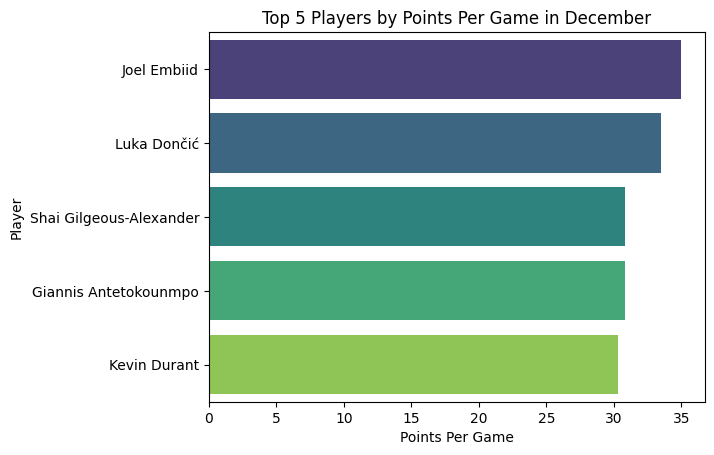

C:\Users\099284\AppData\Local\Temp\ipykernel_10916\1422568057.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PTS', y='Player', data=top_players, palette='viridis')


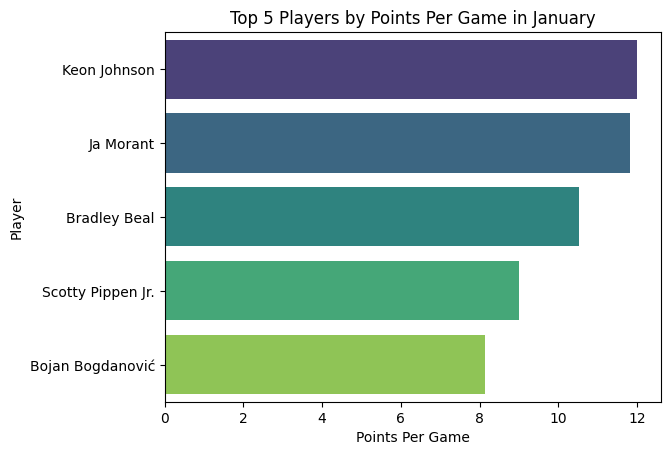

In [261]:
# top 5 players by points
for month in ['December', 'January']:
    top_players = monthly_df[monthly_df['month'] == month].nlargest(5, 'PTS')[['Player', 'PTS']]
    sns.barplot(x='PTS', y='Player', data=top_players, palette='viridis')
    plt.title(f'Top 5 Players by Points Per Game in {month}')
    plt.xlabel('Points Per Game')
    plt.ylabel('Player')
    plt.show()

C:\Users\099284\AppData\Local\Temp\ipykernel_10916\1439882300.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_players_data['month'] = pd.Categorical(top_players_data['month'], categories=['December', 'January'], ordered=True)


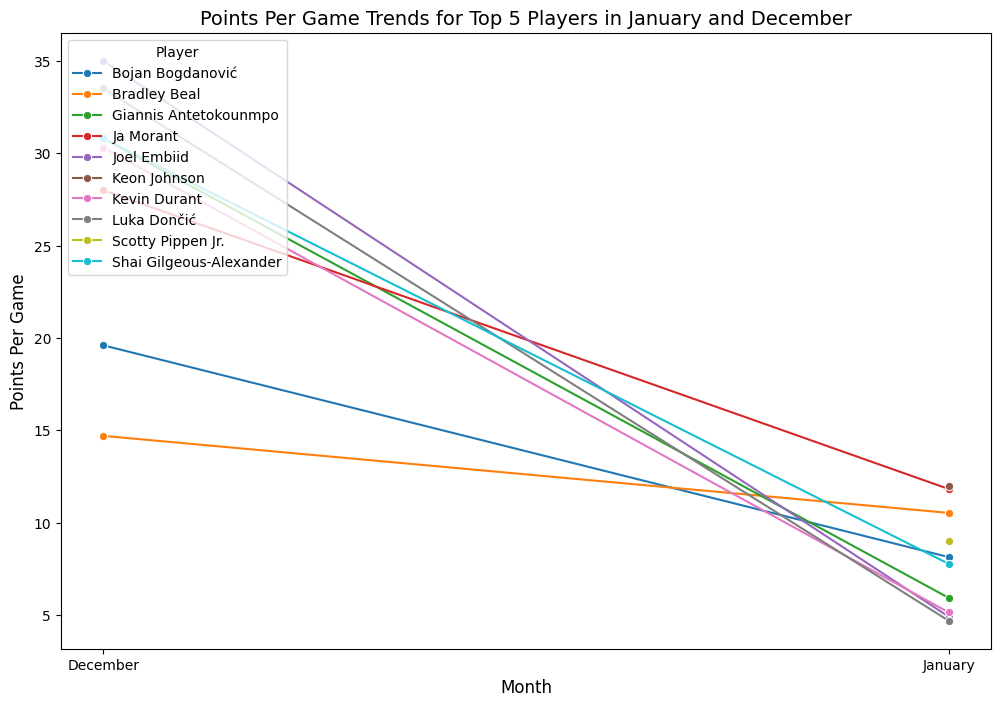

In [262]:
jan_dec_data = monthly_df[monthly_df['month'].isin(['January', 'December'])]

# Get the top 5 players for November
top_players_jan = (
    jan_dec_data[jan_dec_data['month'] == 'January']
    .nlargest(5, 'PTS')[['Player']]
    .drop_duplicates()['Player']
    .tolist()
)

# Get the top 5 players for December
top_players_dec = (
    jan_dec_data[jan_dec_data['month'] == 'December']
    .nlargest(5, 'PTS')[['Player']]
    .drop_duplicates()['Player']
    .tolist()
)

# Combine the two lists of players (ensure uniqueness)
top_players_combined = list(set(top_players_jan + top_players_dec))

# Filter the data for these players
top_players_data = jan_dec_data[jan_dec_data['Player'].isin(top_players_combined)]

# Sort the data by month for proper visualization
top_players_data['month'] = pd.Categorical(top_players_data['month'], categories=['December', 'January'], ordered=True)
top_players_data = top_players_data.sort_values(['Player', 'month'])

# Plot trends for the top players
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_players_data, x='month', y='PTS', hue='Player', marker='o', palette='tab10')
plt.title('Points Per Game Trends for Top 5 Players in January and December', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Points Per Game', fontsize=12)
plt.legend(title='Player', fontsize=10, loc='upper left')
plt.show()

**Hypothesis Testing Based on the Chart**

**Analysis of Points Per Game Trends**
The chart above shows the **Points Per Game (PTS)** trends for the top-performing players across **December and January**. Each line represents a player's performance in both months.

**Observation**

From the chart:
1. Many players show a **decline in Points Per Game (PTS)** in January compared to December.
2. This pattern suggests a potential overall decrease in offensive performance in January.

**Hypothesis**

We hypothesize that the **average Points Per Game (PTS)** in **December** is higher than in **January** across all players.

**Additional Metrics**

To extend this analysis, we test the following metrics:
- **Defensive Rebounds (DRB)**: Measures defensive activity.
- **Steals (STL)**: Indicates defensive pressure and ability to disrupt opponents.
- **Assists (AST)**: Reflects teamwork and playmaking ability.

**Testing the Hypothesis**

For each metric, we:
1. Calculate the **average performance** in December and January across all players.
2. Compare the averages to determine if a similar trend exists.
3. Visualize the results using bar plots.



Average PTS Per Game by Month:
month
December    8.474043
January     2.061677
Name: PTS, dtype: float64


C:\Users\099284\AppData\Local\Temp\ipykernel_10916\2766766308.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_per_month.index, y=avg_per_month.values, palette='viridis')


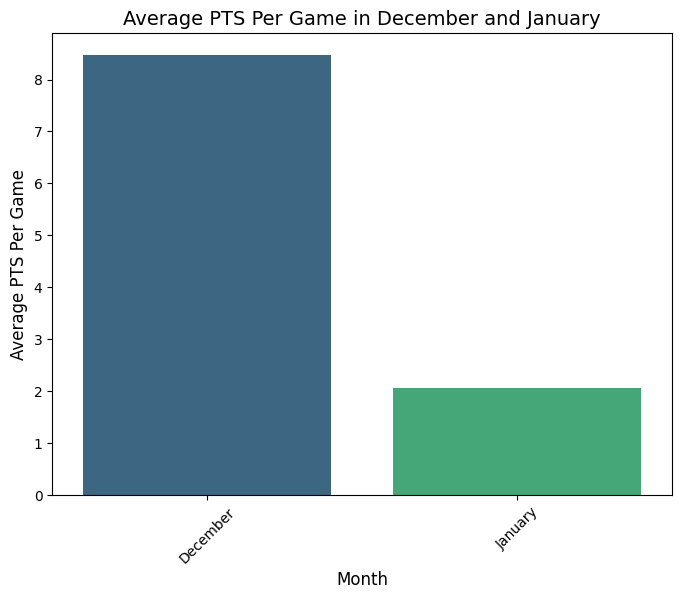


Average STL Per Game by Month:
month
December    0.578729
January     0.140219
Name: STL, dtype: float64


C:\Users\099284\AppData\Local\Temp\ipykernel_10916\2766766308.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_per_month.index, y=avg_per_month.values, palette='viridis')


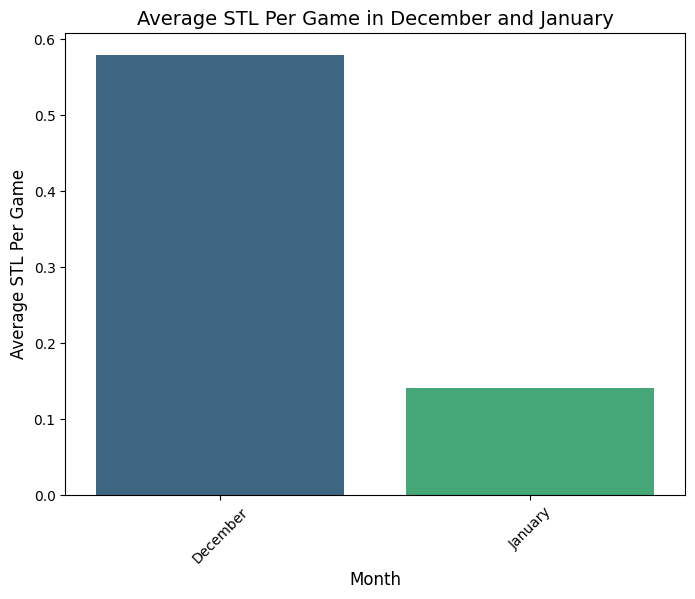


Average AST Per Game by Month:
month
December    1.978113
January     0.492472
Name: AST, dtype: float64


C:\Users\099284\AppData\Local\Temp\ipykernel_10916\2766766308.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_per_month.index, y=avg_per_month.values, palette='viridis')


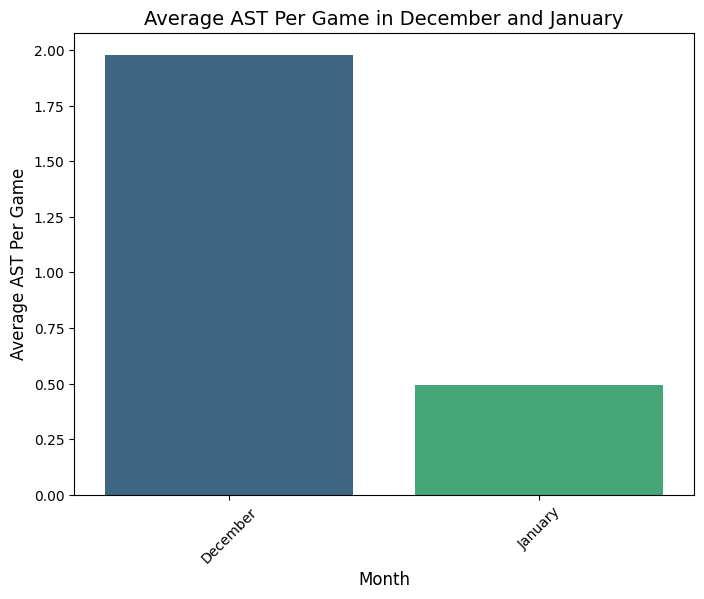


Average DRB Per Game by Month:
month
December    2.477315
January     0.605854
Name: DRB, dtype: float64


C:\Users\099284\AppData\Local\Temp\ipykernel_10916\2766766308.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_per_month.index, y=avg_per_month.values, palette='viridis')


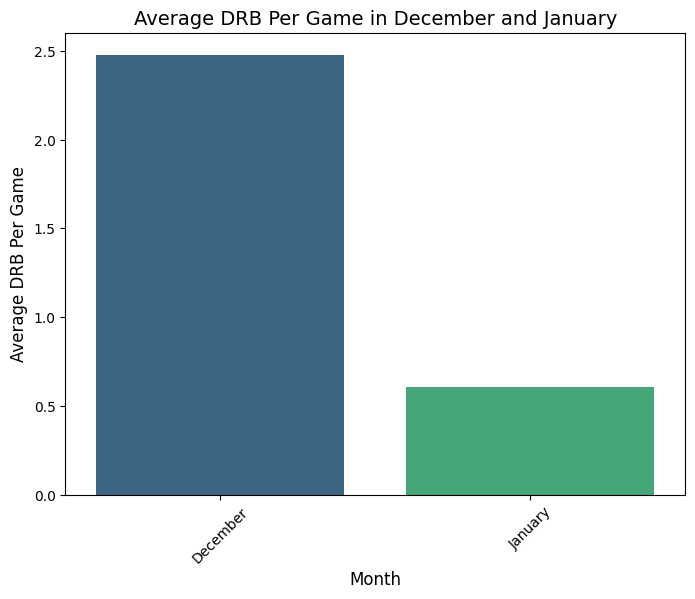

In [263]:
# Metrics to test
metrics = ['PTS', 'STL', 'AST', 'DRB']

# Dictionary to store average results for each metric
avg_results = {}

# Loop through each metric to calculate and visualize
for metric in metrics:
    # Calculate averages
    avg_per_month = monthly_df.groupby('month')[metric].mean()
    avg_results[metric] = avg_per_month

    # Print the averages
    print(f"\nAverage {metric} Per Game by Month:")
    print(avg_per_month)

    # Plot the averages
    plt.figure(figsize=(8, 6))
    sns.barplot(x=avg_per_month.index, y=avg_per_month.values, palette='viridis')
    plt.title(f'Average {metric} Per Game in December and January', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel(f'Average {metric} Per Game', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

Visualize top Players each months for other metrics

C:\Users\099284\AppData\Local\Temp\ipykernel_10916\1537568919.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_players_data['month'] = pd.Categorical(top_players_data['month'], categories=['December', 'January'], ordered=True)
C:\Users\099284\AppData\Local\Temp\ipykernel_10916\1537568919.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=top_players_data, x='month', y=metric, hue='Player', marker='o', palette='tab10', ci= None)


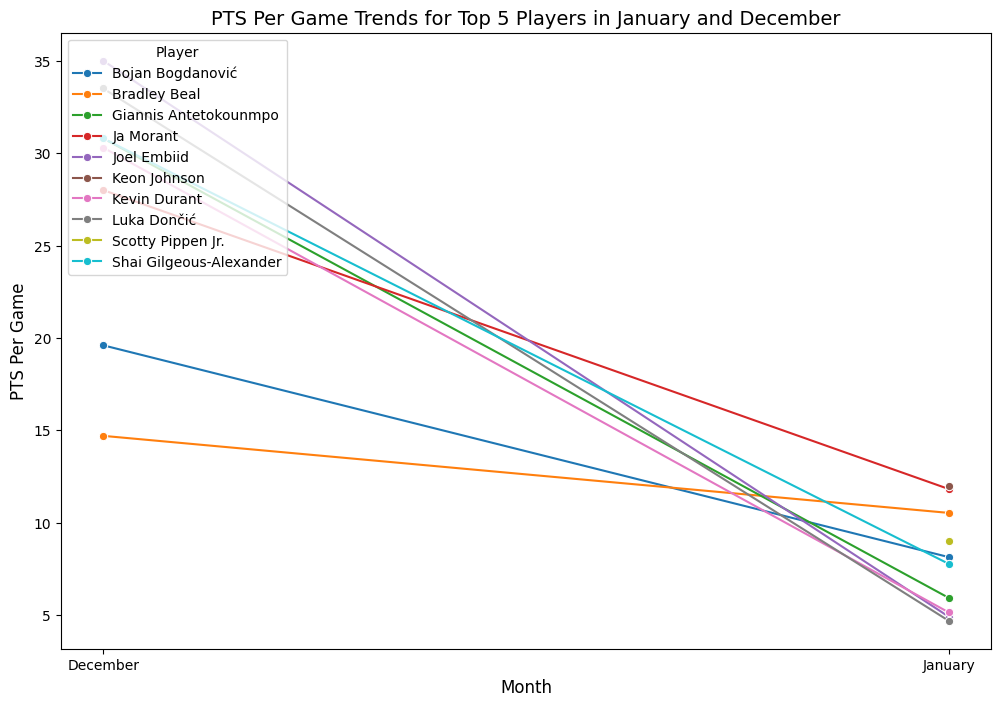

C:\Users\099284\AppData\Local\Temp\ipykernel_10916\1537568919.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_players_data['month'] = pd.Categorical(top_players_data['month'], categories=['December', 'January'], ordered=True)
C:\Users\099284\AppData\Local\Temp\ipykernel_10916\1537568919.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=top_players_data, x='month', y=metric, hue='Player', marker='o', palette='tab10', ci= None)


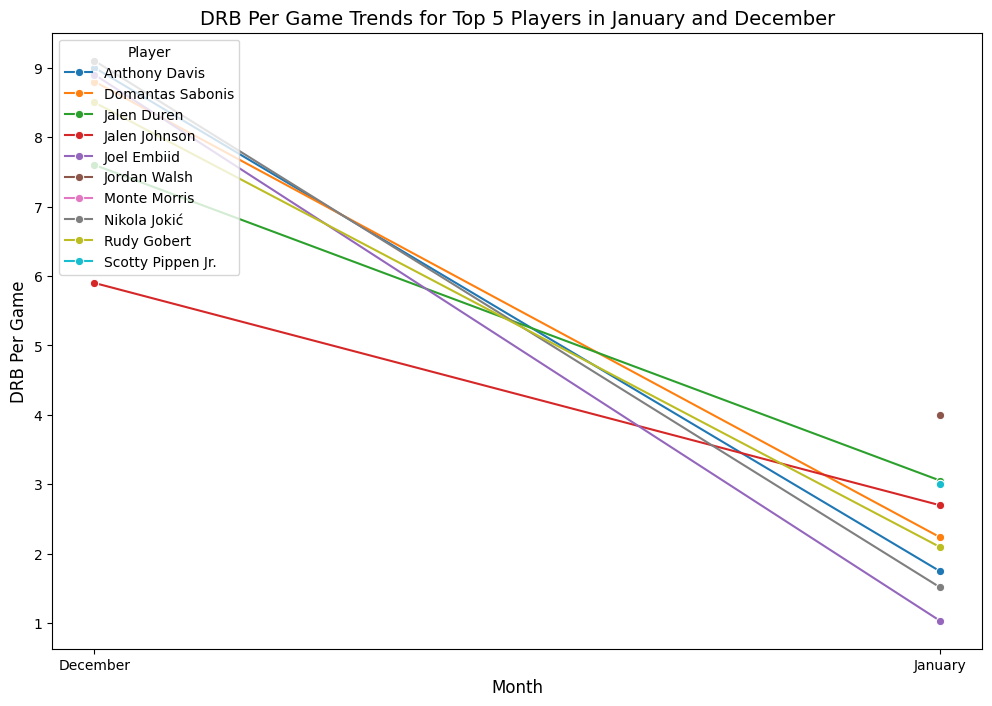

C:\Users\099284\AppData\Local\Temp\ipykernel_10916\1537568919.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_players_data['month'] = pd.Categorical(top_players_data['month'], categories=['December', 'January'], ordered=True)
C:\Users\099284\AppData\Local\Temp\ipykernel_10916\1537568919.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=top_players_data, x='month', y=metric, hue='Player', marker='o', palette='tab10', ci= None)


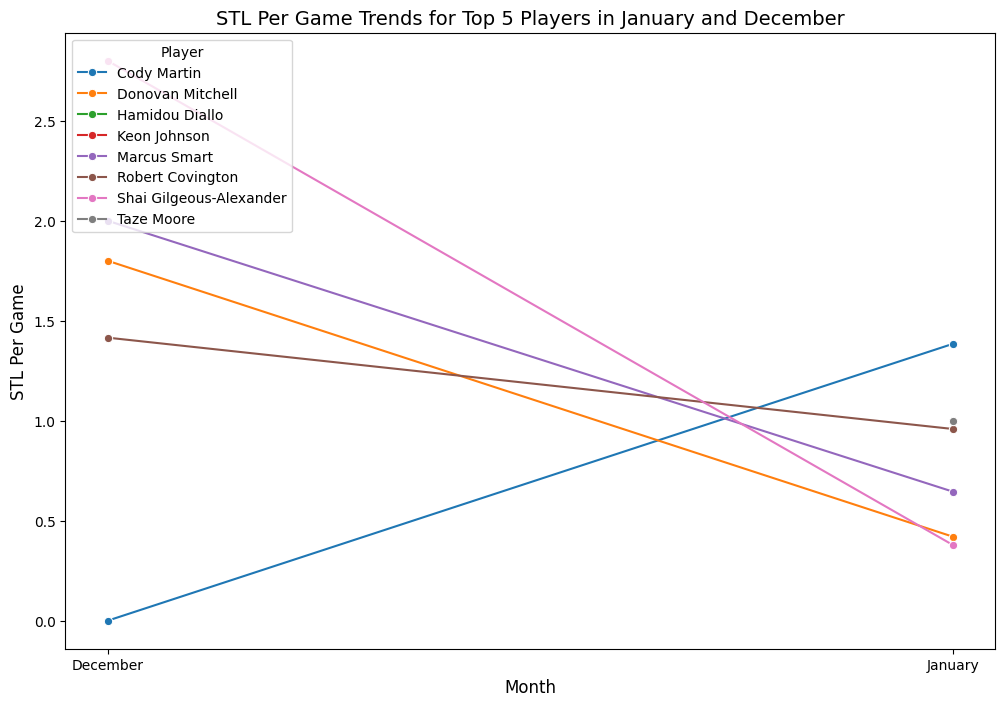

C:\Users\099284\AppData\Local\Temp\ipykernel_10916\1537568919.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_players_data['month'] = pd.Categorical(top_players_data['month'], categories=['December', 'January'], ordered=True)
C:\Users\099284\AppData\Local\Temp\ipykernel_10916\1537568919.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=top_players_data, x='month', y=metric, hue='Player', marker='o', palette='tab10', ci= None)


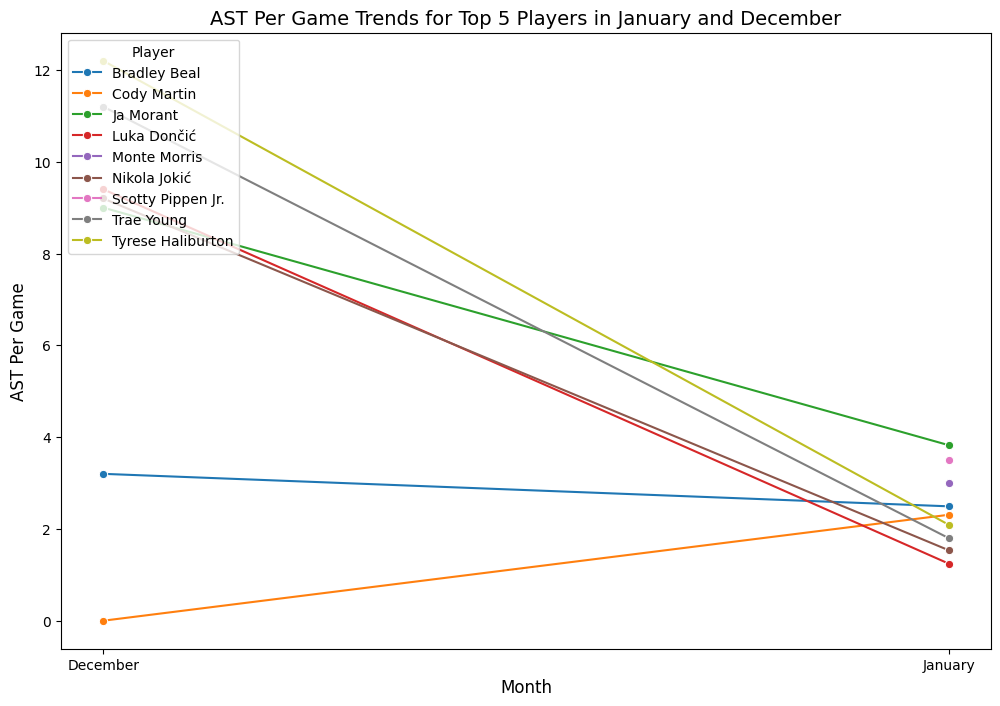

In [264]:
metrics = ['PTS', 'DRB', 'STL', 'AST']
for metric in metrics:
    jan_dec_data = monthly_df[monthly_df['month'].isin(['January', 'December'])]


    top_players_jan = (
        jan_dec_data[jan_dec_data['month'] == 'January']
        .nlargest(5, metric)[['Player']]
        .drop_duplicates()['Player']
        .tolist()
    )

    top_players_dec = (
        jan_dec_data[jan_dec_data['month'] == 'December']
        .nlargest(5, metric)[['Player']]
        .drop_duplicates()['Player']
        .tolist()
    )

    top_players_combined = list(set(top_players_jan + top_players_dec))

    top_players_data = jan_dec_data[jan_dec_data['Player'].isin(top_players_combined)]

    top_players_data['month'] = pd.Categorical(top_players_data['month'], categories=['December', 'January'], ordered=True)
    top_players_data = top_players_data.sort_values(['Player', 'month'])

    plt.figure(figsize=(12, 8))
    sns.lineplot(data=top_players_data, x='month', y=metric, hue='Player', marker='o', palette='tab10', ci= None)
    plt.title(f'{metric} Per Game Trends for Top 5 Players in January and December', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel(f'{metric} Per Game', fontsize=12)
    plt.legend(title='Player', fontsize=10, loc='upper left')
    plt.show()

**Conclusion: Decline in Competitiveness from December to January**

**Key Insights**
1. **Offensive Metrics**:
   - **Points Per Game (PTS)**: Top-performing players achieved higher PTS averages in December. The downward trend into January suggests a drop in offensive intensity.
   
2. **Defensive Metrics**:
   - **Defensive Rebounds (DRB)**: The higher DRB averages in December indicate greater defensive activity, with players consistently recovering missed shots.
   - **Steals (STL)**: December saw more steals per game, showcasing stronger defensive pressure compared to January.

3. **Teamwork Metrics**:
   - **Assists (AST)**: Assists were notably higher in December, reflecting more collaborative and dynamic offensive strategies during that month.

**Hypothesis: December Games Were More Intense**
- The higher performance metrics across **offense, defense, and teamwork** in December suggest that games were played at a higher level of intensity compared to January.
- The decline in January may reflect:
  - **Mid-season fatigue**, leading to a reduction in player energy and focus.
  - **Strategic adjustments**, with teams opting for more cautious or defensive approaches in January.

**Key Takeaways**
- December showcased a **peak in player performance**, with games being more competitive and action-packed.
- January’s decline in metrics could indicate the impact of seasonal dynamics, such as accumulated fatigue or adjustments in game strategies.

---

**Visual Evidence**
- The charts for PTS, DRB, STL, and AST show a clear decline from December to January, further supporting the hypothesis.

**Next Steps**
1. **Deeper Team Analysis**:
   - Explore whether certain teams contributed more significantly to the decline in January.
2. **Workload Impact**:
   - Analyze player fatigue and its potential role in the drop in metrics.

**Final Thought**
December marked a period of peak performance and intensity, making it the highlight of the season thus far, while January reflected a more subdued and strategic phase.


## Statistical Test

1. Statistical Tests
We conducted t-tests to determine if there are significant differences in player performance metrics between December and January. Metrics analyzed include:
- Points Per Game (PTS)
- Assists Per Game (AST)
- Defensive Rebounds Per Game (DRB)
- Steals Per Game (STL)

DISTRIBUTION CHECK

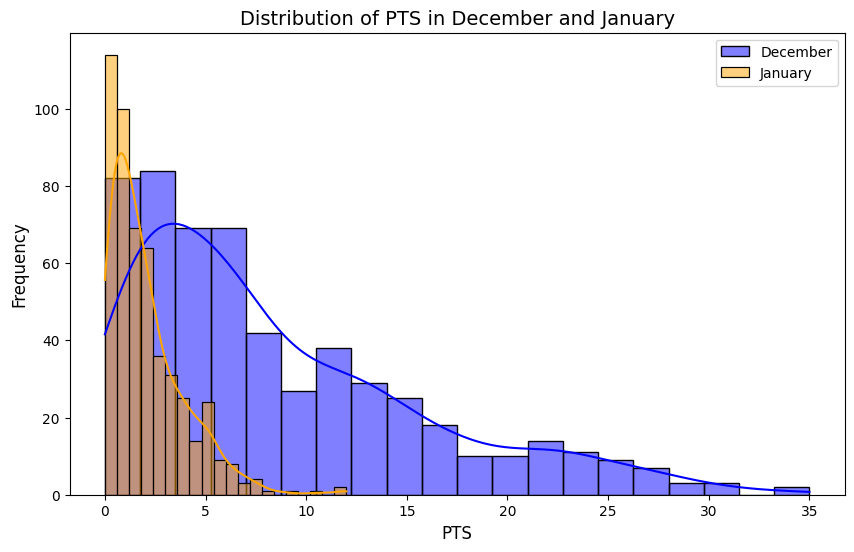


Shapiro-Wilk Test for PTS:
  December: W-statistic = 0.8914, p-value = 0.0000
  January: W-statistic = 0.8593, p-value = 0.0000

Normal Test (D’Agostino and Pearson) for PTS:
  December: Statistic = 87.0165, p-value = 0.0000
  January: Statistic = 167.0653, p-value = 0.0000
--------------------------------------------------


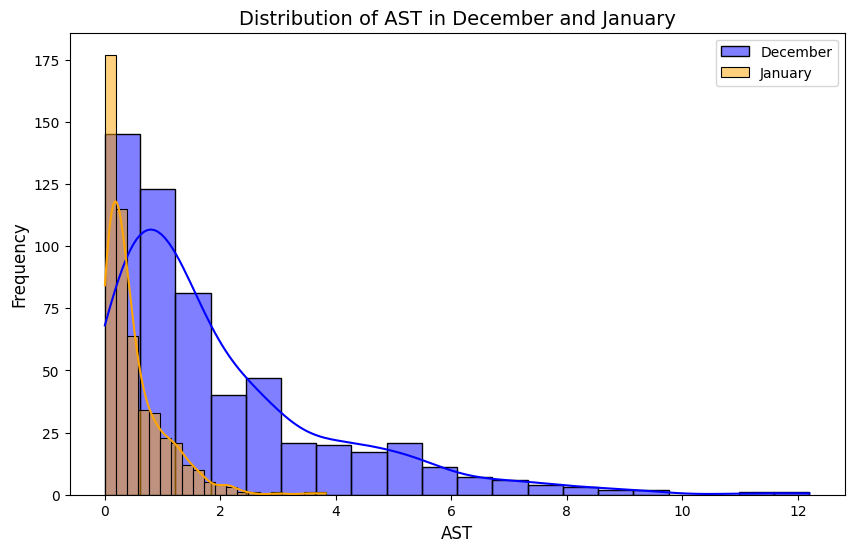


Shapiro-Wilk Test for AST:
  December: W-statistic = 0.8327, p-value = 0.0000
  January: W-statistic = 0.7974, p-value = 0.0000

Normal Test (D’Agostino and Pearson) for AST:
  December: Statistic = 183.1384, p-value = 0.0000
  January: Statistic = 236.7856, p-value = 0.0000
--------------------------------------------------


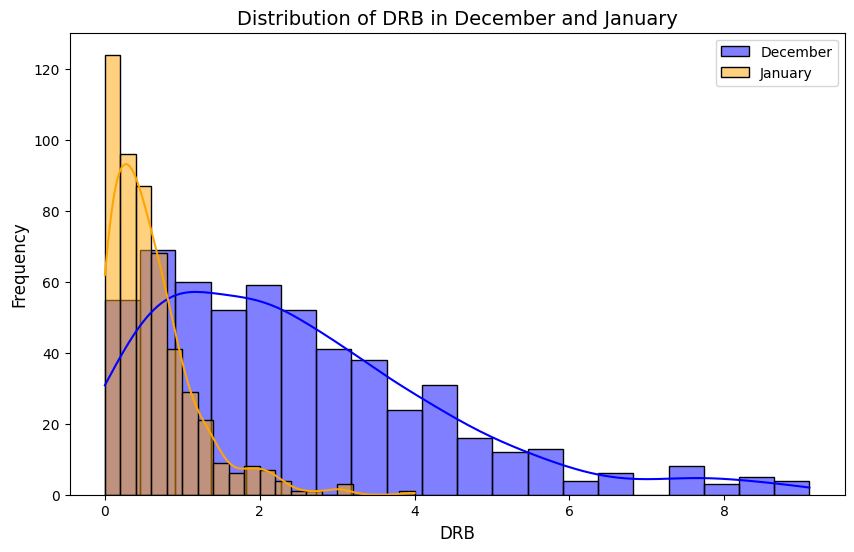


Shapiro-Wilk Test for DRB:
  December: W-statistic = 0.9200, p-value = 0.0000
  January: W-statistic = 0.8484, p-value = 0.0000

Normal Test (D’Agostino and Pearson) for DRB:
  December: Statistic = 89.0662, p-value = 0.0000
  January: Statistic = 199.5166, p-value = 0.0000
--------------------------------------------------


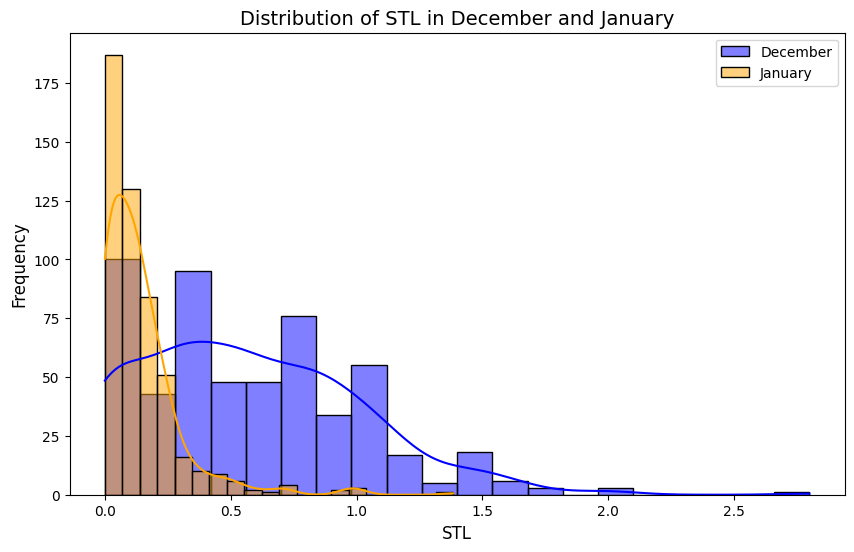


Shapiro-Wilk Test for STL:
  December: W-statistic = 0.9438, p-value = 0.0000
  January: W-statistic = 0.7284, p-value = 0.0000

Normal Test (D’Agostino and Pearson) for STL:
  December: Statistic = 53.9183, p-value = 0.0000
  January: Statistic = 356.8102, p-value = 0.0000
--------------------------------------------------


In [272]:
from scipy.stats import shapiro, normaltest
metrics = ['PTS', 'AST', 'DRB', 'STL'] 

# iterate through each metric
for metric in metrics:
    december_data = monthly_df[monthly_df['month'] == 'December'][metric]
    january_data = monthly_df[monthly_df['month'] == 'January'][metric]
    
    plt.figure(figsize=(10, 6))
    sns.histplot(december_data, kde=True, color='blue', label='December', bins=20)
    sns.histplot(january_data, kde=True, color='orange', label='January', bins=20)
    plt.title(f'Distribution of {metric} in December and January', fontsize=14)
    plt.xlabel(metric, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.show()
    
    # Shapiro-Wilk test for normality
    december_stat, december_p = shapiro(december_data)
    january_stat, january_p = shapiro(january_data)

    print(f"\nShapiro-Wilk Test for {metric}:")
    print(f"  December: W-statistic = {december_stat:.4f}, p-value = {december_p:.4f}")
    print(f"  January: W-statistic = {january_stat:.4f}, p-value = {january_p:.4f}")
    
    # normal test (D’Agostino and Pearson’s test)
    december_stat, december_p = normaltest(december_data)
    january_stat, january_p = normaltest(january_data)

    print(f"\nNormal Test (D’Agostino and Pearson) for {metric}:")
    print(f"  December: Statistic = {december_stat:.4f}, p-value = {december_p:.4f}")
    print(f"  January: Statistic = {january_stat:.4f}, p-value = {january_p:.4f}")
    print("-" * 50)


Because all the datas not normally distributed, we use Mann-Whitney U test to difference significancy

In [273]:
from scipy.stats import mannwhitneyu

metrics = ['PTS', 'AST', 'DRB', 'STL']  # Add more metrics as needed
for metric in metrics:
    december_data = monthly_df[monthly_df['month'] == 'December'][metric]
    january_data = monthly_df[monthly_df['month'] == 'January'][metric]
    
    # Mann-Whitney U Test
    stat, p_value = mannwhitneyu(december_data, january_data, alternative='two-sided')
    print(f"Mann-Whitney U Test for {metric}:")
    print(f"  U-statistic = {stat:.4f}, p-value = {p_value:.4f}")
    
    # interpret the results
    if p_value < 0.05:
        print(f"  Result: Significant difference in {metric} between December and January.\n")
    else:
        print(f"  Result: No significant difference in {metric} between December and January.\n")
    print("-" * 50)

Mann-Whitney U Test for PTS:
  U-statistic = 229740.0000, p-value = 0.0000
  Result: Significant difference in PTS between December and January.

--------------------------------------------------
Mann-Whitney U Test for AST:
  U-statistic = 221626.0000, p-value = 0.0000
  Result: Significant difference in AST between December and January.

--------------------------------------------------
Mann-Whitney U Test for DRB:
  U-statistic = 236201.0000, p-value = 0.0000
  Result: Significant difference in DRB between December and January.

--------------------------------------------------
Mann-Whitney U Test for STL:
  U-statistic = 226678.5000, p-value = 0.0000
  Result: Significant difference in STL between December and January.

--------------------------------------------------


**Results**:
- Metrics with p-value < 0.05 indicate significant differences between months.
- Metrics with p-value ≥ 0.05 indicate no significant difference.

In [ ]:
from sklearn.linear_model import LinearRegression

metrics = ['PTS', 'AST', 'DRB', 'STL']

df['month_numeric'] = df['month'].map({'November': 1, 'December': 2, 'January': 3})
mean_data = df.groupby('month_numeric')[metrics].mean().reset_index()

predictions = {}

for metric in metrics:
    # prepare the training data for the current metric
    X_train = mean_data[['month_numeric']]  # feature: month_numeric
    y_train = mean_data[metric]  # target: metric values
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # predict for February (month_numeric = 4)
    february_numeric = pd.DataFrame({'month_numeric': [4]})
    february_prediction = model.predict(february_numeric)
    
    # clip negative predictions to zero
    february_prediction = np.clip(february_prediction, a_min=0, a_max=None)[0]
    
    predictions[metric] = {
        'Actual Means (Nov-Jan)': list(y_train),
        'Predicted Mean (Feb)': february_prediction
    }

for metric, result in predictions.items():
    print(f"\nMetric: {metric}")
    print(f"  Actual Means (Nov-Jan): {result['Actual Means (Nov-Jan)']}")
    print(f"  Predicted Mean (Feb): {result['Predicted Mean (Feb)']:.2f}")



Metric: PTS
  Actual Means (Nov-Jan): [8.541836734693877, 8.4878612716763, 8.393501805054152]
  Predicted Mean (Feb): 8.33

Metric: AST
  Actual Means (Nov-Jan): [1.9685714285714286, 1.9689788053949904, 1.9637184115523467]
  Predicted Mean (Feb): 1.96

Metric: DRB
  Actual Means (Nov-Jan): [2.5436734693877554, 2.4863198458574183, 2.4664259927797834]
  Predicted Mean (Feb): 2.42

Metric: STL
  Actual Means (Nov-Jan): [0.5953061224489795, 0.577456647398844, 0.5673285198555957]
  Predicted Mean (Feb): 0.55


In [309]:
from sklearn.metrics import mean_squared_error, r2_score

evaluation_results = {}

for metric in metrics:
    # Prepare training data
    X_train = mean_data[['month_numeric']]
    y_train = mean_data[metric]
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict for training data to evaluate the model
    y_pred_train = model.predict(X_train)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_train, y_pred_train)
    rmse = mse ** 0.5
    r2 = r2_score(y_train, y_pred_train)
    
    # Store evaluation results
    evaluation_results[metric] = {
        'R²': r2,
        'MSE': mse,
        'RMSE': rmse
    }

# Display evaluation results
for metric, result in evaluation_results.items():
    print(f"\nMetric: {metric}")
    print(f"  R²: {result['R²']:.3f}")
    print(f"  MSE: {result['MSE']:.3f}")
    print(f"  RMSE: {result['RMSE']:.3f}")



Metric: PTS
  R²: 0.976
  MSE: 0.000
  RMSE: 0.010

Metric: AST
  R²: 0.687
  MSE: 0.000
  RMSE: 0.001

Metric: DRB
  R²: 0.927
  MSE: 0.000
  RMSE: 0.009

Metric: STL
  R²: 0.975
  MSE: 0.000
  RMSE: 0.002


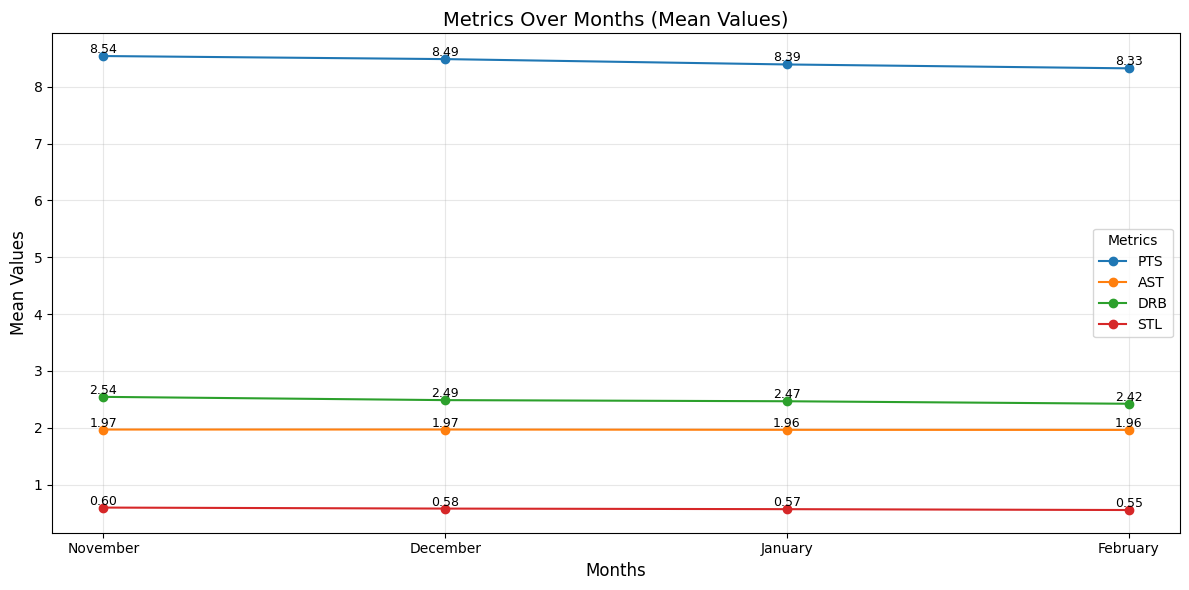

In [ ]:
months = ['November', 'December', 'January', 'February']
metrics = ['PTS', 'AST', 'DRB', 'STL']
mean_values = {metric: [] for metric in metrics}

# iterate through months to calculate mean for each metric
for month_idx in range(len(months)):
    for metric in metrics:
        # collect values for the current month
        if month_idx < 3:  # actual values (Nov-Jan)
            values = df[df['month'] == months[month_idx]][metric].values
            mean_values[metric].append(np.mean(values))
        else:  # february predicted value
            mean_values[metric].append(evaluations[metric]['Predicted February'])

plt.figure(figsize=(12, 6))
for metric, values in mean_values.items():
    plt.plot(months, values, marker='o', label=metric)
    for i, value in enumerate(values):
        plt.text(months[i], value, f'{value:.2f}', fontsize=9, ha='center', va='bottom')

plt.title('Metrics Over Months (Mean Values)', fontsize=14)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Mean Values', fontsize=12)
plt.legend(title='Metrics', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# show the plot
plt.show()

# TASK 2

In [296]:
import pandas as pd
import sqlite3
import os

In [ ]:
# define database connection
db_path = "etl_pipeline.db"  # SQLite database path
conn = sqlite3.connect(db_path)

# define the data folder path
data_folder = "data"  # Replace with your extracted folder path

In [ ]:
# function to load CSV files into SQLite tables
def load_raw_data_to_db(data_folder, conn):
    for file in os.listdir(data_folder):
        if file.endswith(".csv"):
            table_name = file.replace(".csv", "").lower()
            file_path = os.path.join(data_folder, file)
            df = pd.read_csv(file_path)
            df.to_sql(table_name, conn, if_exists="replace", index=False)
            print(f"Loaded {table_name} into database.")

load_raw_data_to_db(data_folder, conn)


Loaded customers_dataset into database.
Loaded geolocation_dataset into database.
Loaded orders_dataset into database.
Loaded order_items_dataset into database.
Loaded order_payments_dataset into database.
Loaded order_reviews_dataset into database.
Loaded products_dataset into database.
Loaded product_category_name_translation into database.
Loaded sellers_dataset into database.


In [ ]:
# create a clean orders table
def create_clean_orders_table(conn):
    query = """
    CREATE TABLE IF NOT EXISTS clean_orders AS
    SELECT
        o.order_id,
        o.customer_id,
        o.order_status,
        o.order_purchase_timestamp,
        o.order_estimated_delivery_date,
        c.customer_unique_id,
        c.customer_city,
        c.customer_state
    FROM
        orders_dataset o
    JOIN
        customers_dataset c
    ON
        o.customer_id = c.customer_id;
    """
    conn.execute(query)
    conn.commit()
    print("Clean orders table created.")

create_clean_orders_table(conn)

Clean orders table created.


In [ ]:
# create a data mart for total sales by state
def create_data_mart(conn):
    query = """
    CREATE TABLE IF NOT EXISTS sales_by_state AS
    SELECT
        c.customer_state,
        COUNT(DISTINCT o.order_id) AS total_orders,
        SUM(op.payment_value) AS total_payment
    FROM
        clean_orders o
    JOIN
        order_payments_dataset op
    ON
        o.order_id = op.order_id
    JOIN
        customers_dataset c
    ON
        o.customer_id = c.customer_id
    GROUP BY
        c.customer_state;
    """
    conn.execute(query)
    conn.commit()
    print("Data mart (sales_by_state) created.")

create_data_mart(conn)


Data mart (sales_by_state) created.


In [ ]:
# function to preview tables
def preview_table(conn, table_name, limit=5):
    query = f"SELECT * FROM {table_name} LIMIT {limit};"
    df = pd.read_sql_query(query, conn)
    print(f"Preview of {table_name}:\n", df)

preview_table(conn, "sales_by_state")


Preview of sales_by_state:
   customer_state  total_orders  total_payment
0             AC            81       19680.62
1             AL           413       96962.06
2             AM           148       27966.93
3             AP            68       16262.80
4             BA          3380      616645.82


In [ ]:
# general function to execute any SQL query
def execute_query(conn, query):
    conn.execute(query)
    conn.commit()

# function to export data mart to a CSV
def export_to_csv(conn, table_name, output_path):
    query = f"SELECT * FROM {table_name};"
    df = pd.read_sql_query(query, conn)
    df.to_csv(output_path, index=False)
    print(f"Exported {table_name} to {output_path}.")


In [ ]:
# load raw data
load_raw_data_to_db(data_folder, conn)

# create clean tables
create_clean_orders_table(conn)

# create data mart
create_data_mart(conn)

# validate and export results
preview_table(conn, "sales_by_state")
export_to_csv(conn, "sales_by_state", "sales_by_state.csv")


Loaded customers_dataset into database.
Loaded geolocation_dataset into database.
Loaded orders_dataset into database.
Loaded order_items_dataset into database.
Loaded order_payments_dataset into database.
Loaded order_reviews_dataset into database.
Loaded products_dataset into database.
Loaded product_category_name_translation into database.
Loaded sellers_dataset into database.
Clean orders table created.
Data mart (sales_by_state) created.
Preview of sales_by_state:
   customer_state  total_orders  total_payment
0             AC            81       19680.62
1             AL           413       96962.06
2             AM           148       27966.93
3             AP            68       16262.80
4             BA          3380      616645.82
Exported sales_by_state to sales_by_state.csv.
